<table>
<tr>
    <td>
        <center>
            <h1>API Rest et Notebook client Rest</h1>
        </center>
    </td>
    <td width=10%>
        Antoine Séguin
    </td>
</tr>
</table>

<br/>
<div id="top"></div>
<br/>
&nbsp;&nbsp;&nbsp; 1) <a href="#dataframe">Appel DataFrame</a><br>

- Stars by birthyear
- Movies by title part
- Stats par stars

&nbsp;&nbsp;&nbsp; 2) <a href="#graph">Graphiques</a><br>

- Repartition par annéée des films et naissances de star
- Diagramme barres sur la carrière du top 10 acteurs : 1 graphe nombre, 1 graphe année min/max

## Librairies

In [58]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, time

## <a id="dataframe"> 1) Appel DataFrame</a>  

#### Stars by birthyear

In [2]:
year = 1962
dfStarsByY=pd.read_json(f'http://localhost:8000/stars/by_birthyear/{year}', convert_dates=['birthdate'])
dfStarsByY.set_index('id',inplace=True)
dfStarsByY

,name,birthdate
id,,
73128,A.J. Benza,1962-01-01
878152,Aida Turturro,1962-01-01
891514,Alex Veadov,1962-01-01
447782,Alexa Kenin,1962-01-01
633457,Amanda Noar,1962-01-01
...,...,...
668615,Vinny Pazienza,1962-01-01
648,Wesley Snipes,1962-01-01
387826,Wilfried Hochholdinger,1962-01-01


#### Movies by title part

In [3]:
title = 'Star'
dfMovieByTitle=pd.read_json('http://localhost:8000/movies/by_title_part?t=' + title)
dfMovieByTitle.set_index('id',inplace=True)
dfMovieByTitle

,title,year,duration
id,,,
8317298,Chanel No. 5: La Star,1990,1.0
778043,Seeing Stars,1927,NaN
49793,Star in the Dust,1956,80.0
76759,Star Wars: Episode IV - A New Hope,1977,121.0
8933914,Star Wars: Episode IV: A New Hope - Deleted Sc...,2011,8.0
2527338,Star Wars: Episode IX - The Rise of Skywalker,2019,142.0
80684,Star Wars: Episode V - The Empire Strikes Back,1980,124.0
8924990,Star Wars: Episode V - The Empire Strikes Back...,1980,12.0
86190,Star Wars: Episode VI - Return of the Jedi,1983,131.0


#### Stats par stars

In [8]:
response = requests.get('http://localhost:8000/stars/count_by_stars/')
data_json = response.json()

In [9]:
data_flatten = [ {**director_dict, 'nb_film': nb_film, 'pfilm': pfilm, 'dfilm': dfilm}  
         for director_dict, nb_film, pfilm, dfilm in data_json ]

In [10]:
dfStatsByStars = pd.DataFrame(data_flatten)
dfStatsByStars.set_index('id',inplace=True)
dfStatsByStars

,birthdate,name,nb_film,pfilm,dfilm
id,,,,,
78,1907-05-26,John Wayne,172,1926,1976
1230,1884-03-16,Harrison Ford,86,1915,1932
230,1946-07-06,Sylvester Stallone,73,1969,2019
125,1930-08-25,Sean Connery,73,1954,2012
158,1956-07-09,Tom Hanks,69,1980,2020
...,...,...,...,...,...
621,1951-01-01,Kurt Russell,10,1989,2019
807911,1932-01-01,Dean Smith,10,1959,1986
604508,1915-01-01,Boyd 'Red' Morgan,10,1960,1971


## <a id="graph"> 2) Graphiques</a>  

#### Repartition par annéée des films et naissances de star

In [14]:
dfStatMovie=pd.read_json('http://localhost:8000/movies/count_by_year')
dfStatMovie.columns=['year', 'counts']
dfStatMovieGraph = dfStatMovie[dfStatMovie.counts > 15].set_index('year')

<AxesSubplot:xlabel='year'>

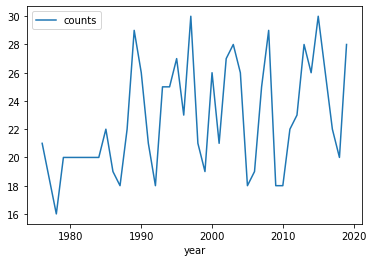

In [15]:
dfStatMovieGraph.plot()

In [37]:
dfStars = pd.read_json('http://localhost:8000/stars', convert_dates = ['birthdate'])
dfStars.set_index('id',inplace=True)
dfStars['year'] = dfStars.birthdate.dt.year

In [41]:
dfCountNameByY = dfStars[['year','name']].groupby(['year']).count()
dfCountNameByY

,name
year,
1846,1
1848,2
1849,1
1850,1
1851,3
...,...
2004,1
2005,2
2006,1


Text(0, 0.5, 'Nombre de stars nées')

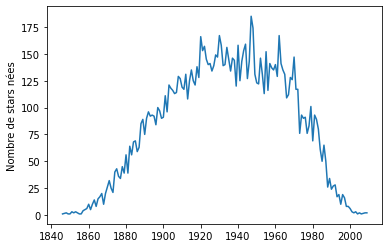

In [100]:
plt.plot(dfCountNameByY.index, dfCountNameByY.name)
plt.ylabel('Nombre de stars nées')

#### Diagramme barres sur la carrière du top 10 acteurs : 1 graphe nombre, 1 graphe année min/max

In [46]:
dfTop10 = dfStatsByStars.head(10)
dfTop10

,birthdate,name,nb_film,pfilm,dfilm
id,,,,,
78,1907-05-26,John Wayne,172,1926,1976
1230,1884-03-16,Harrison Ford,86,1915,1932
230,1946-07-06,Sylvester Stallone,73,1969,2019
125,1930-08-25,Sean Connery,73,1954,2012
158,1956-07-09,Tom Hanks,69,1980,2020
241,1960-10-18,Jean-Claude Van Damme,66,1979,2019
142,1930-05-31,Clint Eastwood,63,1955,2018
148,1942-07-13,Harrison Ford,63,1966,2020
216,1947-07-30,Arnold Schwarzenegger,56,1970,2019


In [49]:
dfTop10ByNb = dfTop10[['name','nb_film']]
dfTop10ByNb.set_index('name',inplace=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

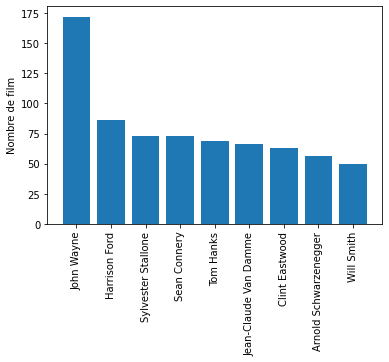

In [98]:
plt.bar(dfTop10ByNb.index, dfTop10ByNb.nb_film)
plt.ylabel('Nombre de film')
plt.xticks(rotation = 90)

In [82]:
dfTop10ByNb.index.to_list()

['John Wayne',
 'Harrison Ford',
 'Sylvester Stallone',
 'Sean Connery',
 'Tom Hanks',
 'Jean-Claude Van Damme',
 'Clint Eastwood',
 'Harrison Ford',
 'Arnold Schwarzenegger',
 'Will Smith']

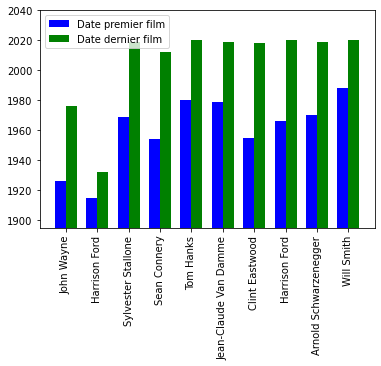

In [97]:
fig = plt.figure()
N = 10
w = 0.35

x = np.arange(N)
ax = fig.add_subplot(111)


rect1 = ax.bar(x, dfTop10.pfilm, w,  color ='b')
rect2 = ax.bar(x + w, dfTop10.dfilm, w,  color ='g')

plt.ylim(min(dfTop10.pfilm)-20, max(dfTop10.dfilm)+20)
ax.set_xticks(x + w/2)
ax.set_xticklabels(dfTop10ByNb.index.to_list())
plt.xticks(rotation = 90)
plt.legend(['Date premier film', 'Date dernier film'])
plt.show()